In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
D = pd.read_csv('C:\\Users\\lenovo\\Desktop\\CCNY\\Adversarial AI\\D4_Minute.csv')
D.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute
0,09:30:00.002130,236.28,100,Z,09:30:00.000093,570
1,09:30:00.002130,236.29,100,K,09:30:00.000101,570
2,09:30:00.002130,236.11,1,K,09:30:00.001527,570
3,09:30:00.002141,236.17,20,K,09:30:00.001640,570
4,09:30:00.002180,236.03,10,K,09:30:00.001714,570


In [11]:
D1 = D[(D['Minute']>775)&(D['Minute']<777)]

In [12]:
D1

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute
1370114,12:56:00.010834,235.96,100,P,12:56:00.010699,776
1370115,12:56:00.010843,235.67,100,P,12:56:00.010699,776
1370116,12:56:00.013627,235.84,100,Y,12:56:00.013201,776
1370117,12:56:00.029590,235.66,100,Y,12:56:00.029131,776
1370118,12:56:00.038568,235.74,100,P,12:56:00.038443,776
...,...,...,...,...,...,...
1372756,12:56:16.840520,235.76,100,P,12:56:16.840372,776
1372757,12:56:16.840632,235.68,7,K,12:56:16.840225,776
1372758,12:56:16.840647,235.73,16,Z,12:56:16.840227,776
1372759,12:56:16.880668,235.57,100,P,12:56:16.880548,776


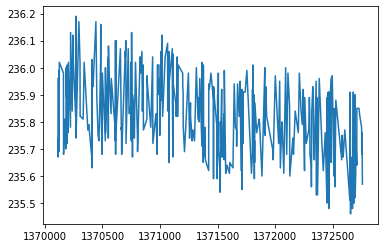

In [26]:
plt.plot(D1[D1.EXCHANGE == 'P'].PRICE)

In [21]:
def computeSecond(s):
    d = pd.to_datetime(s)
    h = d.hour
    m = d.minute
    sec = d.second
    return 60*(60*h+m)+sec

def addSecondsColumn(data):
    data['Second'] = data.apply(lambda x: computeSecond(x['Time']),axis=1)
    return data

In [23]:
D1 = addSecondsColumn(D1)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
D1

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute,Second
1370114,12:56:00.010834,235.96,100,P,12:56:00.010699,776,46560
1370115,12:56:00.010843,235.67,100,P,12:56:00.010699,776,46560
1370116,12:56:00.013627,235.84,100,Y,12:56:00.013201,776,46560
1370117,12:56:00.029590,235.66,100,Y,12:56:00.029131,776,46560
1370118,12:56:00.038568,235.74,100,P,12:56:00.038443,776,46560
...,...,...,...,...,...,...,...
1372756,12:56:16.840520,235.76,100,P,12:56:16.840372,776,46576
1372757,12:56:16.840632,235.68,7,K,12:56:16.840225,776,46576
1372758,12:56:16.840647,235.73,16,Z,12:56:16.840227,776,46576
1372759,12:56:16.880668,235.57,100,P,12:56:16.880548,776,46576


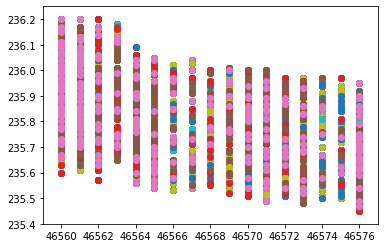

In [27]:
for exchange in D1.EXCHANGE:
    plt.scatter(D1[D1.EXCHANGE == exchange].Second, D1[D1.EXCHANGE == exchange].PRICE)

In [29]:
D1['Total_Price'] = D1.apply(lambda x: x['PRICE']*x['SIZE'],axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
sec = D1.Second.unique()
len(list(sec))

17

In [92]:
d = D1[D1.Second == sec[0]]
d[d.EXCHANGE == 'P'].Total_Price.sum()/d[d.EXCHANGE == 'P'].SIZE.sum()

235.8934820295983

In [136]:
avg = []
for sec1 in list(sec):
    print(sec1)
    d = D1[D1.Second == sec1]
    for exchange in d.EXCHANGE.unique():
        print(exchange)
        avg.append(d[d.EXCHANGE == str(exchange)].Total_Price.sum()/d[d.EXCHANGE == str(exchange)].SIZE.sum())
        data_frame[str(sec1)].append(avg)

46560
P


KeyError: '46560'

In [137]:
data_frame = pd.DataFrame(index = np.arange(20), columns = D1.Second.unique())

In [138]:
data_frame

,46560,46561,46562,46563,46564,46565,46566,46567,46568,46569,46570,46571,46572,46573,46574,46575,46576
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
d = D1[D1.Second == sec[0]]
for exchange in d.EXCHANGE.unique():
    avg.append(d[d.EXCHANGE == exchange].Total_Price.sum()/d[d.EXCHANGE == exchange].SIZE.sum())